In [1]:
import json
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_dataframe(json_data, target_entities, aspects):
    df = pd.DataFrame({'id': [], 'text': [], 'target_entity': [], 'aspect': [], 'sentiment': []})
    j = 0
    for entity in target_entities:
        print(f"\n\n{entity}")

        for aspect in aspects:
            for sample in json_data:
                id = str(int(sample['id']))
                text = sample['text'].strip()
                # Check for entity in text
                if entity in text:
                    # To check if sentiment is given
                    has_senti = False 
                    for opinion in sample['opinions']:                    
                        if opinion['target_entity'] == entity and opinion['aspect'] == aspect:
                            df.loc[j] = [id, text, entity, aspect, opinion['sentiment']]
                            has_senti = True
                            j += 1
                            break
                    # "None" if no sentiment is found                
                    if not has_senti:
                        df.loc[j] = [id, text, entity, aspect, 'None']
                        j += 1

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3), gridspec_kw={'width_ratios': [3, 1]})
        df.sentiment.value_counts().plot(kind='barh', ax=axes[0])
        df.aspect.value_counts().plot(kind='barh', ax=axes[1])
        fig.tight_layout()
        plt.show()
    
    print("\n")
    df = df.sort_values(by="id").reset_index(drop=True)
    display(df)

    return df

In [4]:
with open('/content/drive/My Drive/absa_sentihood/data/sentihood-train.json', 'r') as fp:
    data_train = json.load(fp)

with open('/content/drive/My Drive/absa_sentihood/data/sentihood-dev.json', 'r') as fp:
    data_val = json.load(fp)

with open('/content/drive/My Drive/absa_sentihood/data/sentihood-test.json', 'r') as fp:
    data_test = json.load(fp)

In [11]:
data_train[0]

{'id': 1430,
 'opinions': [{'aspect': 'price',
   'sentiment': 'Negative',
   'target_entity': 'LOCATION1'}],
 'text': '    LOCATION1 is transforming and the prices will go up and up'}

In [6]:
target_entities = ['LOCATION1', 'LOCATION2']
aspects = ['general','price','safety','transit-location']



LOCATION1


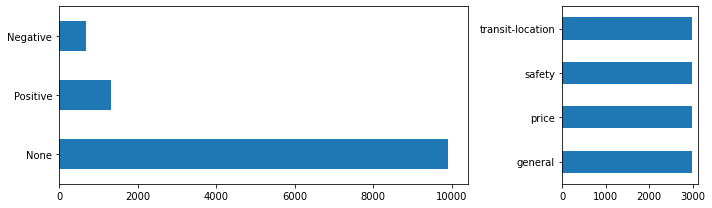



LOCATION2


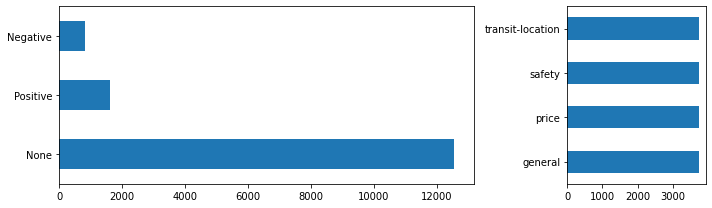

,id,text,target_entity,aspect,sentiment
0,0,"LOCATION2, LOCATION1",LOCATION1,transit-location,None
1,0,"LOCATION2, LOCATION1",LOCATION2,safety,None
2,0,"LOCATION2, LOCATION1",LOCATION2,transit-location,None
3,0,"LOCATION2, LOCATION1",LOCATION1,safety,None
4,0,"LOCATION2, LOCATION1",LOCATION1,general,None
...,...,...,...,...,...
15003,998,"At night prostitutes take over LOCATION1 road,...",LOCATION1,general,None
15004,999,LOCATION1 is very expensive: this is the heart...,LOCATION1,general,None
15005,999,LOCATION1 is very expensive: this is the heart...,LOCATION1,safety,None
15006,999,LOCATION1 is very expensive: this is the heart...,LOCATION1,transit-location,None


In [7]:
df_train = get_dataframe(data_train, target_entities, aspects)



LOCATION1


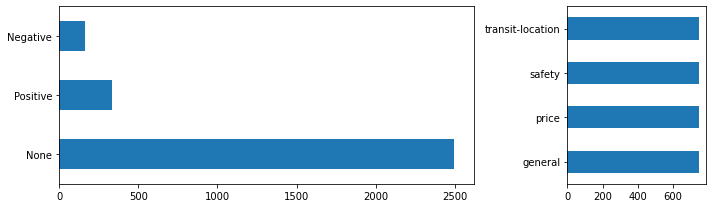



LOCATION2


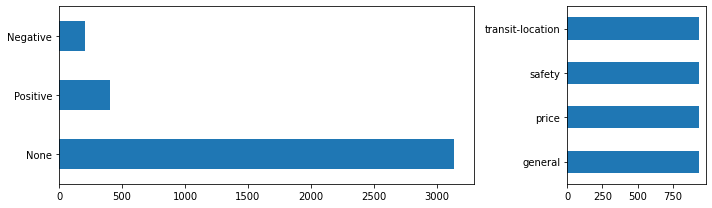

,id,text,target_entity,aspect,sentiment
0,0,I stayed in LOCATION1 and loved the area,LOCATION1,general,Positive
1,0,I stayed in LOCATION1 and loved the area,LOCATION1,safety,None
2,0,I stayed in LOCATION1 and loved the area,LOCATION1,transit-location,None
3,0,I stayed in LOCATION1 and loved the area,LOCATION1,price,None
4,1,LOCATION1 has some trendy bars and a few resta...,LOCATION1,general,None
...,...,...,...,...,...
3743,98,"However, between April and September part of t...",LOCATION1,price,None
3744,99,"Theres a great shop in LOCATION1 tesco, belie...",LOCATION1,safety,None
3745,99,"Theres a great shop in LOCATION1 tesco, belie...",LOCATION1,price,None
3746,99,"Theres a great shop in LOCATION1 tesco, belie...",LOCATION1,general,None


In [8]:
df_val = get_dataframe(data_val, target_entities, aspects)



LOCATION1


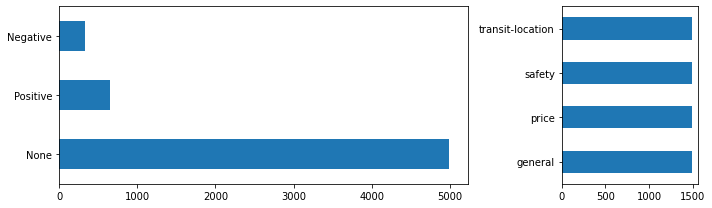



LOCATION2


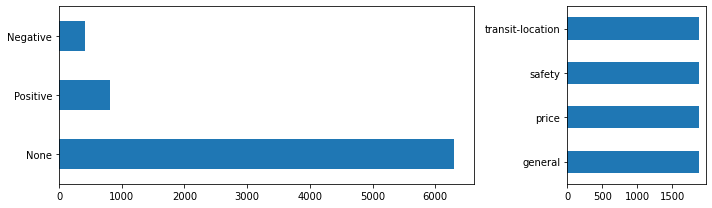

,id,text,target_entity,aspect,sentiment
0,0,If you want to go out drinking where the cool ...,LOCATION1,general,None
1,0,If you want to go out drinking where the cool ...,LOCATION1,transit-location,None
2,0,If you want to go out drinking where the cool ...,LOCATION1,price,None
3,0,If you want to go out drinking where the cool ...,LOCATION1,safety,None
4,1,Edit: LOCATION1 matchdays much be a godsend fo...,LOCATION1,general,None
...,...,...,...,...,...
7511,998,I was about equidistant from LOCATION1 and LOC...,LOCATION2,safety,None
7512,999,"LOCATION1 used to be known as Hatcham, an Angl...",LOCATION1,safety,None
7513,999,"LOCATION1 used to be known as Hatcham, an Angl...",LOCATION1,general,None
7514,999,"LOCATION1 used to be known as Hatcham, an Angl...",LOCATION1,transit-location,None


In [9]:
df_test = get_dataframe(data_test, target_entities, aspects)

In [10]:
df_train.to_csv('/content/drive/My Drive/absa_sentihood/data/df_train.csv', index=None)
df_val.to_csv('/content/drive/My Drive/absa_sentihood/data/df_val.csv', index=None)
df_test.to_csv('/content/drive/My Drive/absa_sentihood/data/df_test.csv', index=None)